In [53]:
### Predicting the future open price of stocks

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df=pd.read_csv('D:\\Machine learning\\stockprice.csv')
df

,Date,Open,High,Low,Close,Total Trade Quantity,Turnover (Lacs)
0,21-07-10,122.10,123.00,121.05,121.55,658666,803.56
1,22-07-10,120.30,122.00,120.25,120.90,293312,355.17
2,23-07-10,121.80,121.95,120.25,120.65,281312,340.31
3,26-07-10,120.10,121.00,117.10,117.60,658440,780.01
4,27-07-10,117.60,119.50,112.00,118.65,586100,694.98
...,...,...,...,...,...,...,...
2030,24-09-18,233.55,239.20,230.75,233.30,3423509,7999.55
2031,25-09-18,233.30,236.75,232.00,236.10,2349368,5503.90
2032,26-09-18,240.00,240.00,232.50,234.25,2240909,5248.60
2033,27-09-18,234.55,236.80,231.10,233.25,5082859,11859.95


In [56]:
type(df['Date'][0])

str

In [57]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%y')

In [58]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
df

,Date,Open,High,Low,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.65,586100,694.98
...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.25,5082859,11859.95


In [60]:
df=df.set_index(df['Date'])


In [61]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [62]:
df

,Open,High,Low,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,
2010-07-21,122.10,123.00,121.05,121.55,658666,803.56
2010-07-22,120.30,122.00,120.25,120.90,293312,355.17
2010-07-23,121.80,121.95,120.25,120.65,281312,340.31
2010-07-26,120.10,121.00,117.10,117.60,658440,780.01
2010-07-27,117.60,119.50,112.00,118.65,586100,694.98
...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,233.30,3423509,7999.55
2018-09-25,233.30,236.75,232.00,236.10,2349368,5503.90
2018-09-26,240.00,240.00,232.50,234.25,2240909,5248.60


# OPEN PREDICTION

In [63]:
x=df.iloc[:,0:1].values
x

array([[122.1 ],
       [120.3 ],
       [121.8 ],
       ...,
       [240.  ],
       [234.55],
       [234.05]])

### feature scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
sc=MinMaxScaler(feature_range=(0,1));

In [66]:
x=sc.fit_transform(x)

In [67]:
x

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64436334],
       [0.62226277],
       [0.6202352 ]])

In [68]:
x_train=[]
x_test=[]

In [69]:
x.shape

(2035, 1)

In [70]:
for i in range(60,2035):
    x_train.append(x[i-60:i])
    x_test.append(x[i])

In [71]:
print(x_train[1][59])
print(x_test[0])

[0.21553122]
[0.21553122]


In [72]:
type(x_train)

list

In [73]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [74]:
type(x_train)

numpy.ndarray

In [75]:
x_train.shape  # model accepts 3d shape 

(1975, 60, 1)

## Building model

In [76]:
from tensorflow.keras.models import Sequential
model=Sequential()

In [77]:
from tensorflow.keras.layers import  LSTM,Dense,Activation,Dropout

In [78]:
model.add(LSTM(units=128,activation='relu',return_sequences=True,input_shape=(60,1)))

In [79]:
model.add(LSTM(units=128,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

In [80]:
model.add(LSTM(units=128,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

In [81]:
model.add(LSTM(units=64,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

In [82]:
model.add(LSTM(units=64,activation='relu'))

In [83]:
model.add(Dense(units=1))

In [84]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [85]:
model.fit(x_train,x_test,epochs=50,batch_size=16)

Epoch 1/50
124/124 [==============================] - 27s 174ms/step - loss: 0.01742s -
Epoch 2/50
124/124 [==============================] - 22s 174ms/step - loss: 0.0030
Epoch 3/50
124/124 [==============================] - 21s 166ms/step - loss: 0.0024
Epoch 4/50
124/124 [==============================] - 21s 167ms/step - loss: 0.0019
Epoch 5/50
124/124 [==============================] - 21s 166ms/step - loss: 0.0019
Epoch 6/50
124/124 [==============================] - 21s 169ms/step - loss: 0.0019
Epoch 7/50
124/124 [==============================] - 21s 167ms/step - loss: 0.0019
Epoch 8/50
124/124 [==============================] - 21s 167ms/step - loss: 0.0016
Epoch 9/50
124/124 [==============================] - 21s 166ms/step - loss: 0.0014
Epoch 10/50
124/124 [==============================] - 21s 168ms/step - loss: 0.0014
Epoch 11/50
124/124 [==============================] - 21s 166ms/step - loss: 0.0012
Epoch 12/50
124/124 [==============================] - 21s 166ms/step 

In [86]:
test=pd.read_csv('D:\\Machine learning\\stockprice-master\\test.csv')
test

,Date,Open,High,Low,Close,Total Trade Quantity,Turnover (Lacs)
0,01-10-18,234.55,234.60,221.05,230.90,1534749,3486.05
1,03-10-18,230.00,237.50,225.75,227.60,1708590,3960.27
2,04-10-18,223.50,227.80,216.15,218.20,1728786,3815.79
3,05-10-18,217.00,218.60,205.90,209.20,3519515,7407.06
4,08-10-18,208.00,222.25,206.85,215.15,4642146,10062.83
5,09-10-18,215.50,219.15,209.60,216.50,1844462,3940.70
6,10-10-18,215.00,229.65,215.00,228.40,2919278,6557.95
7,11-10-18,215.00,229.70,215.00,224.60,1293881,2890.85
8,12-10-18,226.25,232.35,225.50,229.10,1165527,2675.91
9,15-10-18,229.70,237.00,226.80,234.90,1224339,2845.68


In [87]:
dataset=pd.concat((df.iloc[-60:,0:1],test.iloc[-60:,1:2]))
dataset

,Open
2018-07-03 00:00:00,264.50
2018-07-04 00:00:00,281.00
2018-07-05 00:00:00,277.45
2018-07-06 00:00:00,269.80
2018-07-09 00:00:00,268.25
...,...
11,237.70
12,230.30
13,229.45
14,221.10


In [88]:
dataset=dataset.values
dataset

array([[264.5 ],
       [281.  ],
       [277.45],
       [269.8 ],
       [268.25],
       [275.9 ],
       [274.8 ],
       [270.4 ],
       [265.  ],
       [257.9 ],
       [241.55],
       [248.4 ],
       [239.7 ],
       [231.25],
       [238.9 ],
       [244.  ],
       [248.5 ],
       [235.9 ],
       [241.  ],
       [243.7 ],
       [243.4 ],
       [248.7 ],
       [232.5 ],
       [236.  ],
       [235.15],
       [241.  ],
       [237.25],
       [236.65],
       [237.3 ],
       [233.  ],
       [235.  ],
       [236.05],
       [240.8 ],
       [244.  ],
       [246.9 ],
       [240.3 ],
       [234.5 ],
       [231.8 ],
       [237.  ],
       [233.85],
       [235.35],
       [237.  ],
       [236.  ],
       [238.2 ],
       [222.  ],
       [224.  ],
       [221.  ],
       [222.5 ],
       [222.5 ],
       [216.35],
       [223.45],
       [233.15],
       [237.9 ],
       [235.95],
       [235.  ],
       [233.55],
       [233.3 ],
       [240.  ],
       [234.55

In [89]:
dataset.shape

(76, 1)

In [90]:
y=sc.transform(dataset)
y

array([[0.74371452],
       [0.81062449],
       [0.79622871],
       [0.76520681],
       [0.75892133],
       [0.78994323],
       [0.78548256],
       [0.7676399 ],
       [0.74574209],
       [0.71695053],
       [0.65064882],
       [0.6784266 ],
       [0.6431468 ],
       [0.60888078],
       [0.63990268],
       [0.66058394],
       [0.67883212],
       [0.62773723],
       [0.64841849],
       [0.6593674 ],
       [0.65815085],
       [0.67964315],
       [0.61394972],
       [0.62814274],
       [0.62469586],
       [0.64841849],
       [0.63321168],
       [0.63077859],
       [0.63341444],
       [0.61597729],
       [0.62408759],
       [0.6283455 ],
       [0.64760746],
       [0.66058394],
       [0.67234388],
       [0.64557989],
       [0.62206002],
       [0.61111111],
       [0.63219789],
       [0.61942417],
       [0.62550689],
       [0.63219789],
       [0.62814274],
       [0.63706407],
       [0.57137064],
       [0.57948094],
       [0.56731549],
       [0.573

In [91]:
y_train=[]
y_test=[]
for i in range(60,76):
    y_train.append(y[i-60:i,0])
    y_test.append(y[i,0])

In [92]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [93]:
y_train.shape

(16, 60)

In [94]:
y_test=y_test.reshape(-1,1)
y_test.shape

(16, 1)

In [95]:
y_train=y_train.reshape(16,60,-1)
y_train.shape

(16, 60, 1)

## Prediction

In [96]:
pred=model.predict(y_train)

In [97]:
pred

array([[0.66070694],
       [0.6591491 ],
       [0.65189254],
       [0.63340884],
       [0.60775495],
       [0.5730989 ],
       [0.56743217],
       [0.569029  ],
       [0.5759915 ],
       [0.5889667 ],
       [0.6075102 ],
       [0.6300169 ],
       [0.6521325 ],
       [0.66064703],
       [0.64872086],
       [0.6232176 ]], dtype=float32)

In [98]:
pred=sc.inverse_transform(pred)
pred

array([[244.03033],
       [243.64618],
       [241.8567 ],
       [237.29863],
       [230.97237],
       [222.4262 ],
       [221.02878],
       [221.42255],
       [223.13951],
       [226.3392 ],
       [230.91202],
       [236.46217],
       [241.91588],
       [244.01556],
       [241.07457],
       [234.78546]], dtype=float32)

In [99]:
y_test=sc.inverse_transform(y_test)

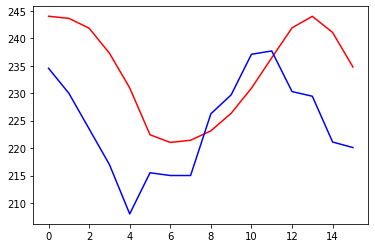

In [100]:
plt.plot
plt.plot(pred,color='r')
plt.plot(y_test,color='b')

In [101]:
print(pred[0])
y_test[0]

[244.03033]


array([234.55])